# Import libraries

In [105]:
import pandas as pd
from sklearn.metrics import DistanceMetric
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.manifold import MDS
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import utils
import config
import re
import os

In [106]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [107]:
metadata = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t", index_col=0)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388


In [111]:
metadata["Sequencing_Project_num"] = metadata["Sequencing_Project"].apply(lambda x : x.split("_")[2])

In [112]:
genefamilies = pd.read_csv(os.path.join(config.CLEAN_DIR, "humann_genefamilies_clean.tsv"), sep="\t", index_col=0)

gene_presence = (genefamilies > 0)
gene_presence

,UniRef90_A0A014AUH4,UniRef90_A0A015QIN6,UniRef90_A0A015S3B6,UniRef90_A0A015SWD5,UniRef90_A0A015T2E3,UniRef90_A0A015TGA7,UniRef90_A0A015WBF1,UniRef90_A0A015WY92,UniRef90_A0A015Y6C2,UniRef90_A0A015YJI0,...,UniRef90_W8TAD5,UniRef90_W8TB91,UniRef90_W8TFY6,UniRef90_W8TUT7,UniRef90_W8TZZ8,UniRef90_W8ZG15,UniRef90_W8ZS14,UniRef90_W9BC30,UniRef90_X1RCG3,UniRef90_X6LTD6
id,,,,,,,,,,,,,,,,,,,,,
magic.0001,False,False,True,True,True,False,False,True,True,False,...,True,True,True,True,True,True,True,True,False,False
magic.0004,False,True,True,False,False,False,True,False,True,False,...,True,True,True,True,True,True,True,True,True,False
magic.0006,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,True,True
magic.0007,True,False,True,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
magic.0008,False,True,True,False,False,False,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,True,True,True,True,True,True,True,True,True,True,...,False,False,True,False,False,False,False,False,True,False
magic.6597,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
magic.6598,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False


In [113]:
dist = DistanceMetric.get_metric('jaccard')
dissim = dist.pairwise(gene_presence)
dissim

array([[0.        , 0.08809759, 0.71476834, ..., 0.75929275, 0.83981717,
        0.94734368],
       [0.08809759, 0.        , 0.71111919, ..., 0.75577292, 0.83904772,
        0.94317108],
       [0.71476834, 0.71111919, 0.        , ..., 0.84553599, 0.88900204,
        0.95997961],
       ...,
       [0.75929275, 0.75577292, 0.84553599, ..., 0.        , 0.52943275,
        0.76932907],
       [0.83981717, 0.83904772, 0.88900204, ..., 0.52943275, 0.        ,
        0.70563117],
       [0.94734368, 0.94317108, 0.95997961, ..., 0.76932907, 0.70563117,
        0.        ]])

In [114]:
dissim_df = pd.DataFrame(dissim, index=metadata.index, columns=metadata.index)
dissim_df

Sample_ID,magic.0001,magic.0004,magic.0006,magic.0007,magic.0008,magic.0010,magic.0011,magic.0012,magic.0013,magic.0014,...,magic.6590,magic.6591,magic.6592,magic.6593,magic.6594,magic.6595,magic.6597,magic.6598,magic.6599,magic.6600
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.000000,0.088098,0.714768,0.171550,0.210959,0.111017,0.925070,0.183999,0.956581,0.260426,...,0.254435,0.806968,0.573077,0.944210,0.355120,0.848870,0.940881,0.759293,0.839817,0.947344
magic.0004,0.088098,0.000000,0.711119,0.164186,0.204014,0.106628,0.923975,0.175573,0.949757,0.264909,...,0.248506,0.805299,0.573178,0.941654,0.356346,0.849510,0.938487,0.755773,0.839048,0.943171
magic.0006,0.714768,0.711119,0.000000,0.692133,0.694085,0.697215,0.937244,0.692091,0.919223,0.711506,...,0.702213,0.870604,0.789204,0.944303,0.745485,0.894316,0.953498,0.845536,0.889002,0.959980
magic.0007,0.171550,0.164186,0.692133,0.000000,0.132205,0.150755,0.916739,0.062834,0.937536,0.189833,...,0.187365,0.775640,0.554395,0.933606,0.313043,0.833960,0.931731,0.741945,0.829593,0.937723
magic.0008,0.210959,0.204014,0.694085,0.132205,0.000000,0.205481,0.920754,0.133019,0.945421,0.248244,...,0.245527,0.790301,0.572386,0.941353,0.350911,0.848518,0.939515,0.756692,0.838172,0.944928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.848870,0.849510,0.894316,0.833960,0.848518,0.844210,0.478418,0.825682,0.862442,0.805113,...,0.809946,0.485954,0.616220,0.706172,0.702976,0.000000,0.528023,0.530429,0.477376,0.695641
magic.6597,0.940881,0.938487,0.953498,0.931731,0.939515,0.934905,0.480041,0.929439,0.801752,0.927062,...,0.908466,0.607310,0.733472,0.554239,0.840196,0.528023,0.000000,0.629785,0.526121,0.509317
magic.6598,0.759293,0.755773,0.845536,0.741945,0.756692,0.755842,0.578895,0.741238,0.911369,0.707208,...,0.716111,0.574648,0.546733,0.766138,0.613837,0.530429,0.629785,0.000000,0.529433,0.769329


In [115]:
mds = MDS(n_jobs=-1, random_state=42, dissimilarity="precomputed")

In [116]:
embedding = mds.fit_transform(dissim_df)
embedding

array([[ 0.44624245,  0.1491349 ],
       [ 0.44744064,  0.14829469],
       [ 0.52973812, -0.45781869],
       ...,
       [-0.0979485 , -0.40916097],
       [-0.25433224, -0.42349016],
       [-0.43770797, -0.63149045]])

In [117]:
metadata["MDS1"] = embedding[:, 0]
metadata["MDS2"] = embedding[:, 1]

# Colored by Sequencing Project

In [1]:
for bold_project in np.unique(metadata["Sequencing_Project_num"]):
    ratio = 10

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=200, 
                             gridspec_kw={'width_ratios': [ratio, 1], 'height_ratios' : [1, ratio]}, 
                            facecolor="white")

    ax = axes[1, 0]
    axes[0, 1].axis('off')

    # main

    for project in np.unique(metadata["Sequencing_Project_num"]):
        alpha = 1 if project == bold_project else 0.1
        project_df = metadata[metadata["Sequencing_Project_num"] == project]
        ax.scatter(project_df["MDS1"], project_df["MDS2"], label=project.replace("_", "\_"), alpha=alpha)

    ax.grid(linestyle = '--', linewidth = 0.5)
    ax.legend(prop={'size': 15}, loc=1, handlelength=1.4, handleheight=1.4)

    ax.set_xlabel("MDS1", fontsize=20)
    ax.set_ylabel("MDS2", fontsize=20)

    # mds1 hist

    for project in np.unique(metadata["Sequencing_Project_num"]):
        alpha = 1 if project == bold_project else 0.1
        project_df = metadata[metadata["Sequencing_Project_num"] == project]
        axes[0, 0].hist(project_df["MDS1"], bins=60, alpha=alpha)

    axes[0, 0].tick_params(
        axis='x',
        which='both',
        bottom=False,
        labelbottom=False,
    )

    #mds2 hist

    for project in np.unique(metadata["Sequencing_Project_num"]):
        alpha = 1 if project == bold_project else 0.1
        project_df = metadata[metadata["Sequencing_Project_num"] == project]
        axes[1, 1].hist(project_df["MDS2"], bins=60, alpha=alpha, orientation='horizontal')

    axes[1, 1].get_yaxis().set_visible(False)

    plt.subplots_adjust(wspace=0.02, hspace=0.02)

    plt.savefig(os.path.join(config.FIGURE_DIR, f"PCoA_seq_project_{bold_project}.png"))
    plt.show()

NameError: name 'np' is not defined

In [108]:
# Colored by sequencing depth

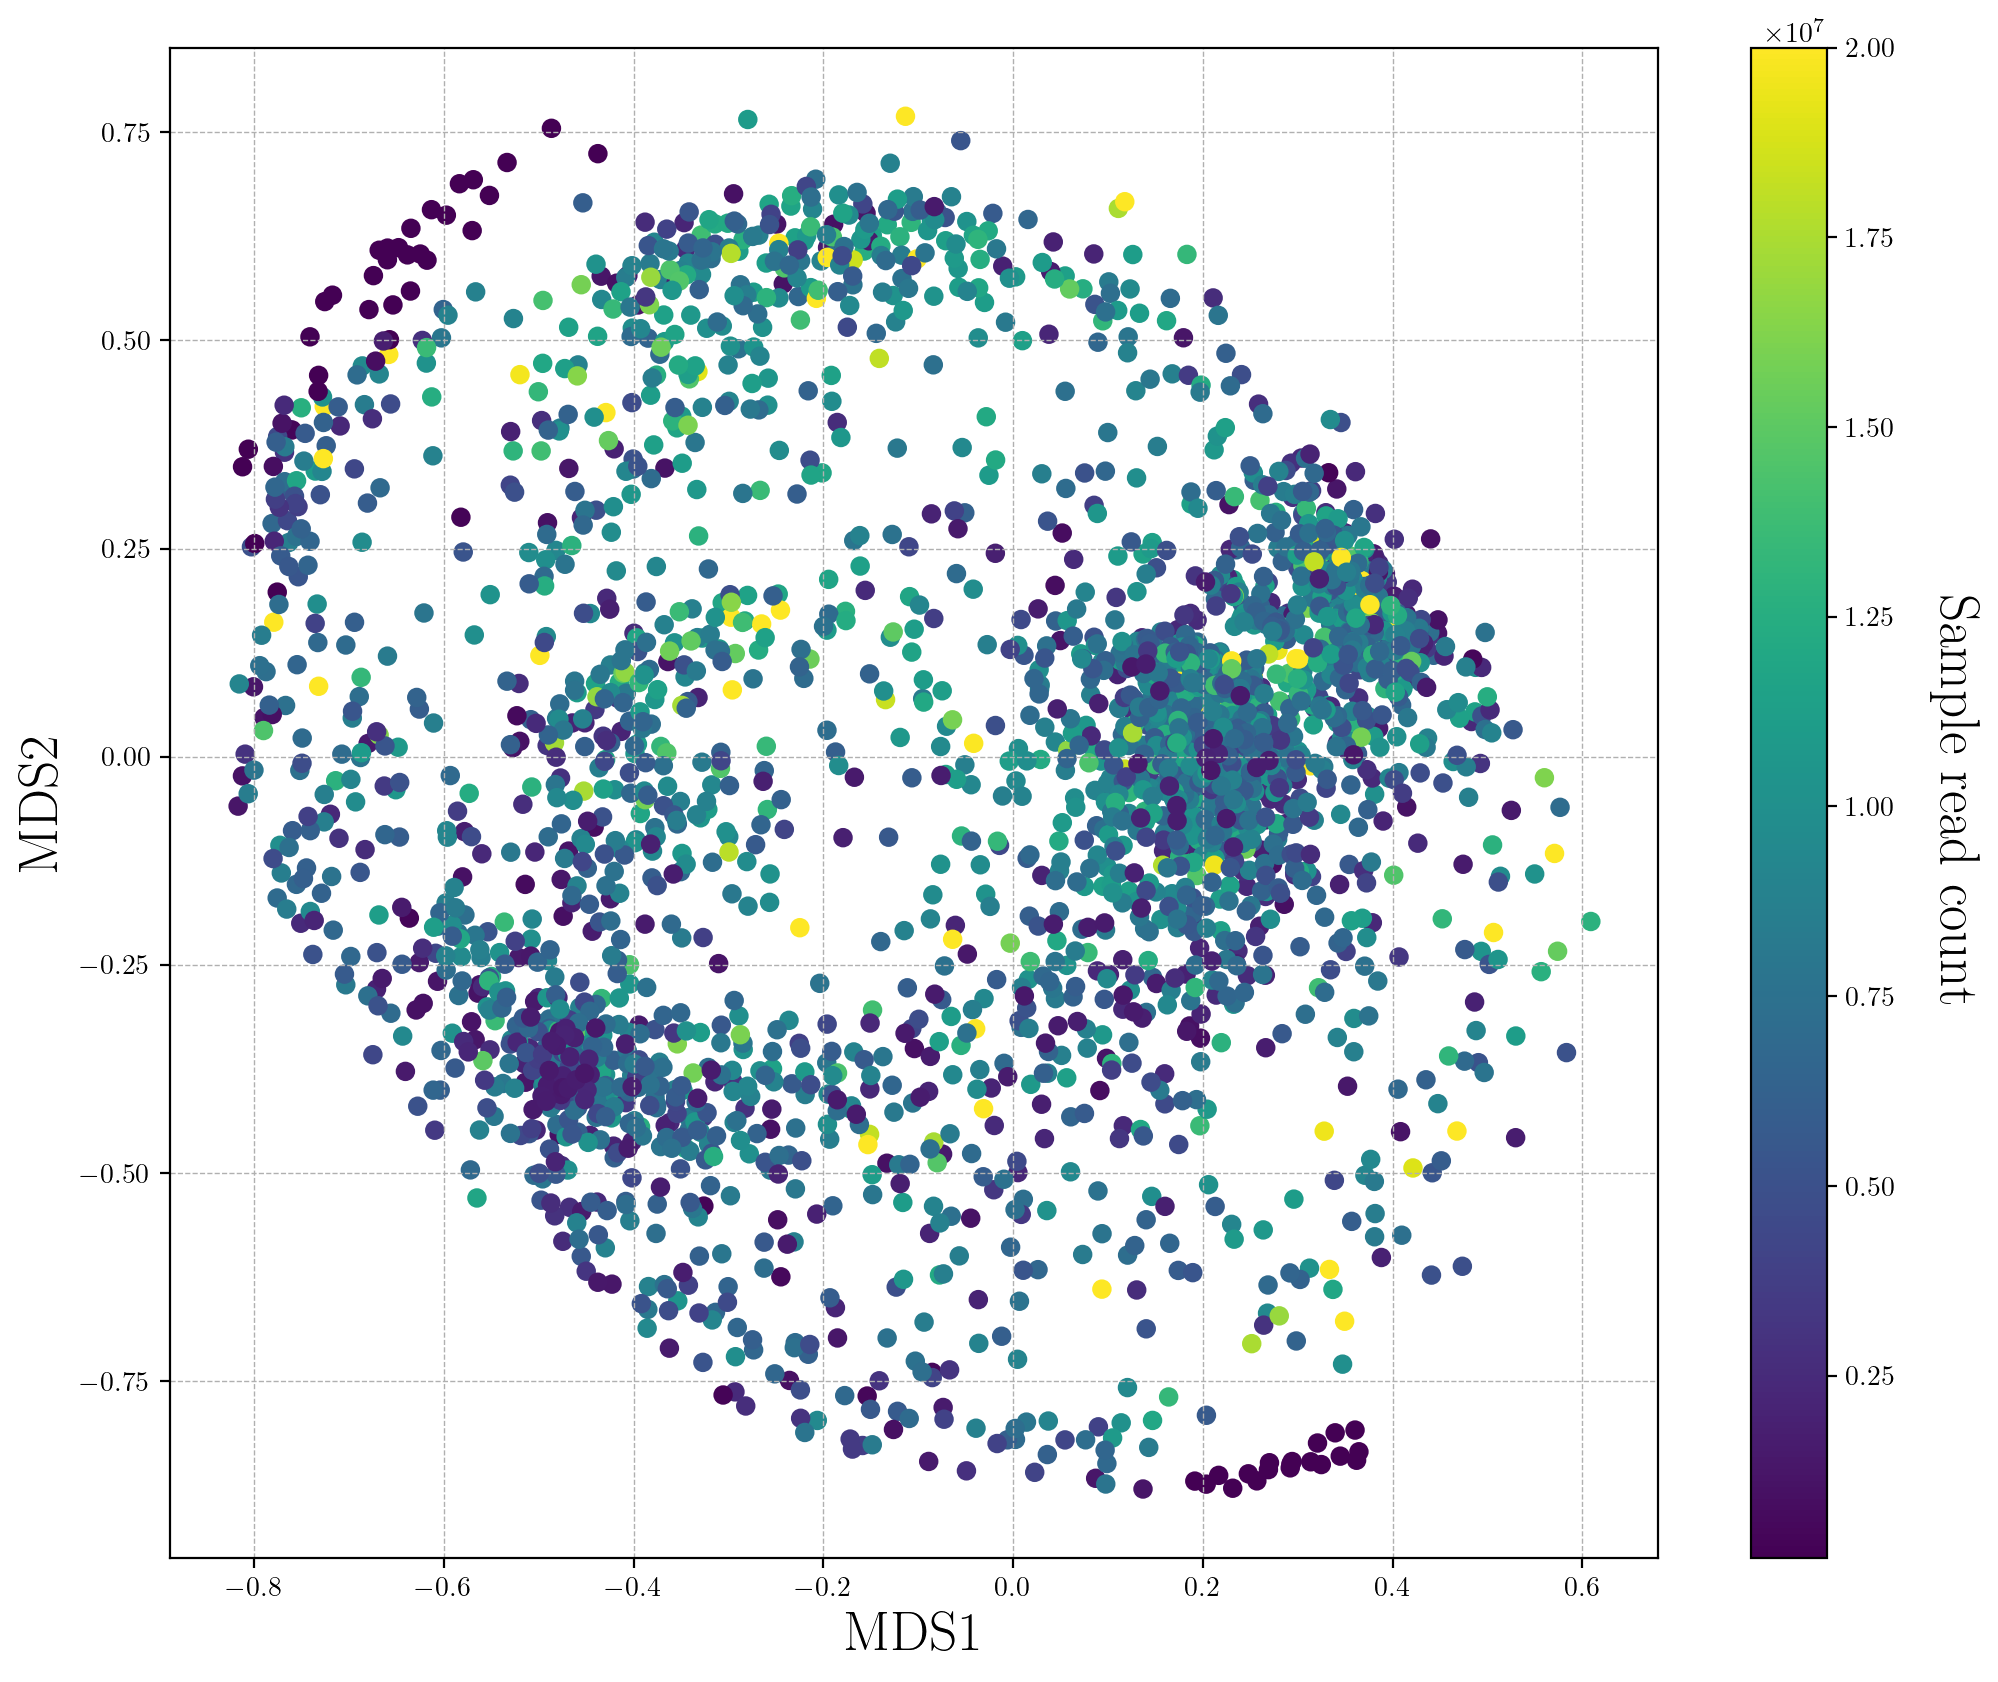

In [148]:
plt.figure(figsize=(12, 10), dpi=200, facecolor="white")

ax = plt.gca()

# main
sc = ax.scatter(metadata["MDS1"], metadata["MDS2"], c=metadata["depth"], vmin=100000, vmax=20000000)
cbar = plt.colorbar(sc, orientation="vertical")#, pad=0.2)
cbar.set_label('Sample read count', rotation=270, fontsize=20, labelpad=30)

ax.grid(linestyle = '--', linewidth = 0.5)
# ax.legend(prop={'size': 15}, loc=1, handlelength=1.4, handleheight=1.4)

ax.set_xlabel("MDS1", fontsize=20)
ax.set_ylabel("MDS2", fontsize=20)

plt.savefig(os.path.join(config.FIGURE_DIR, f"PCoA_depth.png"))
plt.show()

(100000.0, 20000000.0)

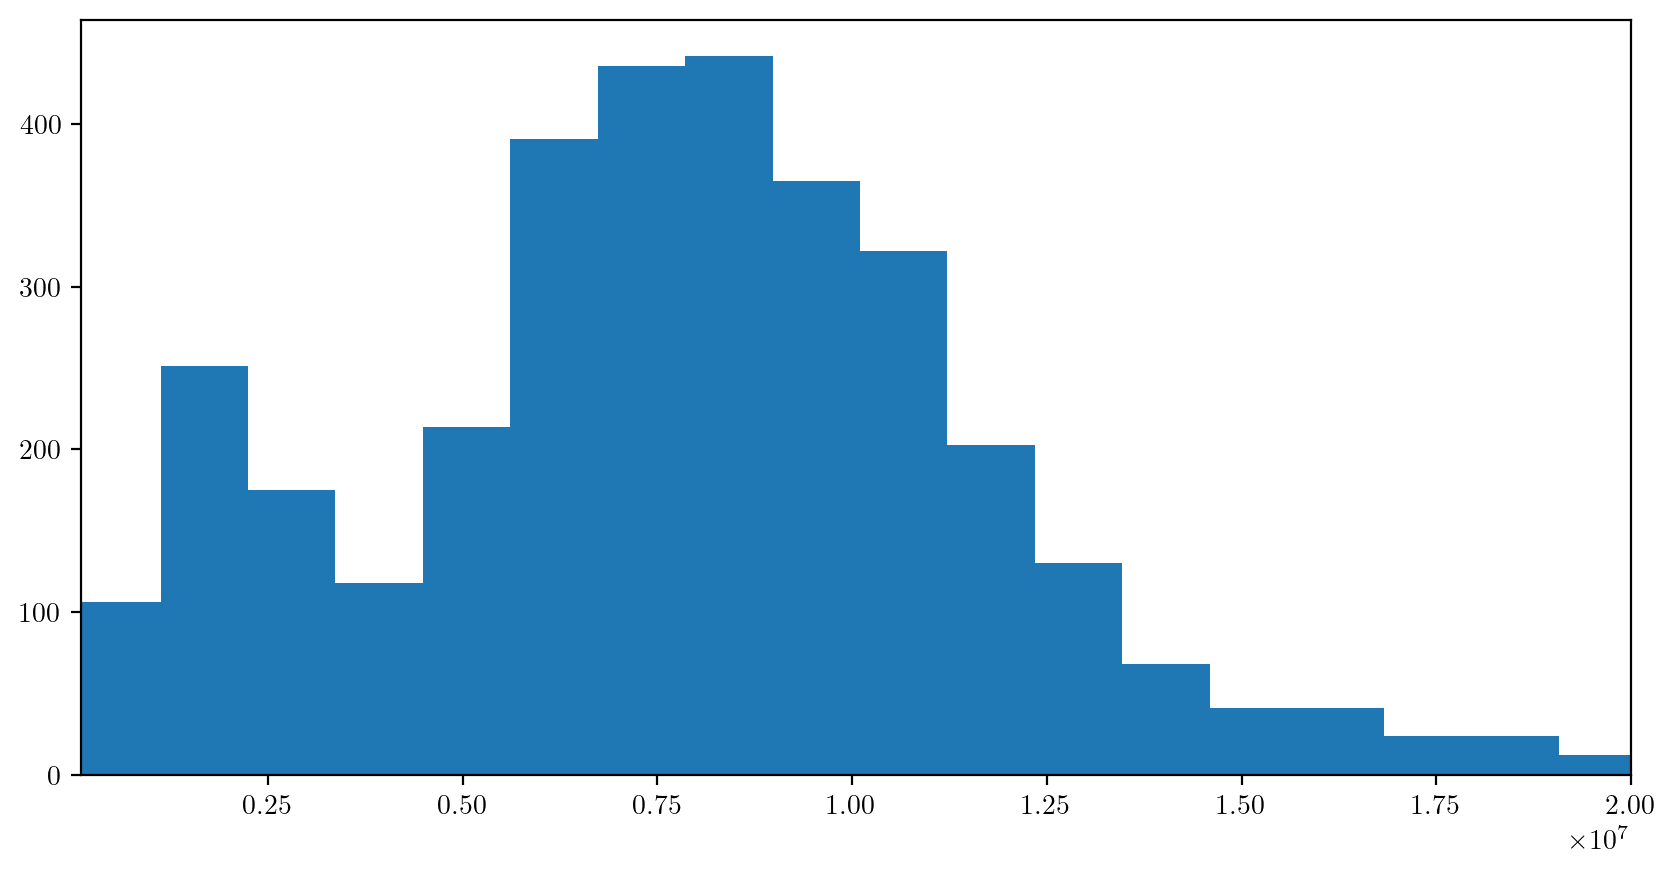

In [131]:
plt.figure(figsize=(10, 5), dpi=200)
plt.hist(metadata["depth"], bins=100)
plt.xlim(100000, 20000000)